In [1]:
import numpy as np
from pprint import pprint
from copy import deepcopy


from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
#from laboneq.contrib.example_helpers.generate_device_setup import generate_device_setup
from laboneq.dsl.device import DeviceSetup




descriptor = generate_descriptor(
    #pqsc=[""], # 장비 여러개 사용시
    shfqc_6=["DEV12256"],
    number_data_qubits=6,
    multiplex=True,
    number_multiplex=6,
    include_cr_lines=True,
    include_ef_lines=True,
    get_zsync=False,  # Only set to True when using real device
    save = True,
    filename="TG_RIP",
    ip_address="192.168.0.83"
)


#descriptor
setup = DeviceSetup.from_descriptor(yaml_text=descriptor, server_host="192.168.0.83")
#setup
setup.instruments[0].device_options = 'SHFQC/PLUS/QC6CH'
#setup.instruments

In [2]:
from laboneq.simple import Session
session = Session(setup)
session.connect(ignore_version_mismatch=False, do_emulation=False)
#session.disconnect()

[2025.12.20 18:59:57.621] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is /home/yalgaeahn/JSAHN/qubit-experiment/examples/laboneq_output/log
[2025.12.20 18:59:57.622] INFO    VERSION: laboneq 25.10.2
[2025.12.20 18:59:57.622] INFO    Connecting to data server at 192.168.0.83:8004
[2025.12.20 18:59:57.806] INFO    Connected to Zurich Instruments LabOne Data Server version 25.10.1.4 at 192.168.0.83:8004
[2025.12.20 18:59:57.859] INFO    Configuring the device setup
[2025.12.20 18:59:57.884] INFO    The device setup is configured


In [3]:
from qpu_types import TransmonQubit, TransmonQubitParameters
from helper import load_qubit_parameters, save_qubit_parameters
from operations import TransmonOperations
from laboneq.dsl.quantum.qpu import QPU, QuantumPlatform



_loaded_qubits = load_qubit_parameters(filename="latest") 
#qubits = TransmonQubit.from_device_setup(setup) # Also can be done with load_qubit_parameters 
qubits = list(_loaded_qubits.values())





qpu = QPU(quantum_elements=qubits, quantum_operations=TransmonOperations())
#quantum_platform = QuantumPlatform(setup=setup, qpu=qpu)

# qpu.topology.add_edge("bus", "q16", "q17")
# qpu.topology.add_edge("bus", "q17", "q18")
# qpu.topology.add_edge("bus", "q18", "q19")
# qpu.topology.plot()




from laboneq.simple import workflow
folder_store = workflow.logbook.FolderStore("./experiment_store") 
folder_store.activate()
#folder_store.deactivate()
#workflow.logbook.LoggingStore().activate()
#workflow.logbook.LogbookStore().deactivate()


LOADED:./qubit_parameters/20251220-1859_COSPEC20.json


In [ ]:
from experiments import echo 

q = qubits[0]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
temporary_parameters[q.uid] = temp_pars
#######################################################################
delays = np.linspace(0,20e-6,301)
detunings = 0.5e6,
pprint(q.readout_parameters())
#######################################################################
options = echo.experiment_workflow.options()
options.update(False)
options.count(1024)
options.use_cal_traces(True)
# Build and run Ramsey workflow (no explicit command table options required)
ramsey_wf = echo.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    delays=delays,
    #detunings=detunings,
    options=options,
    temporary_parameters=temporary_parameters
)
ramsey_result = ramsey_wf.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
print(ramsey_result.tasks['analysis_workflow'].output)
ramsey_result.tasks['analysis_workflow'].tasks['plot_population'].output['q0']

# Ramsey

In [ ]:
from experiments import ramsey

q = qubits[0]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
temporary_parameters[q.uid] = temp_pars
#######################################################################
delays = np.linspace(0,10e-6,301)
detunings = 0.5e6,
pprint(q.readout_parameters())
#######################################################################
options = ramsey.experiment_workflow.options()
options.update(False)
options.count(1024)
options.use_cal_traces(True)
# Build and run Ramsey workflow (no explicit command table options required)
ramsey_wf = ramsey.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    delays=delays,
    detunings=detunings,
    options=options,
    temporary_parameters=temporary_parameters
)
ramsey_result = ramsey_wf.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
print(ramsey_result.tasks['analysis_workflow'].output)
ramsey_result.tasks['analysis_workflow'].tasks['plot_population'].output['q0']

In [ ]:
qubits[0].parameters.resonance_frequency_ge

# Coherence Spectroscopy

residual charge noise 같은것 때문에 ECHO 쓸 예정

In [4]:
#mode1
qubits[2].parameters.readout_range_out = 0
qubits[2].parameters.readout_integration_delay = 400e-9

#mode3
qubits[4].parameters.readout_range_out = 0
qubits[4].parameters.readout_integration_delay = 400e-9

In [6]:
qubits[2].parameters.drive_range

10

('measure', {'amplitude': 0.7, 'length': 1e-06, 'pulse': {'function': 'GaussianSquare', 'sigma': 0.2, 'risefall_sigma_ratio': 3.0}})
[2025.12.20 20:44:30.447] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.12.20 20:44:30.448] INFO      Workflow 'coherence_spectroscopy': execution started at 2025-12-20            
[2025.12.20 20:44:30.448] INFO      11:44:30.447462Z                                                              
[2025.12.20 20:44:30.448] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.12.20 20:44:30.457] INFO    Task 'temporary_qpu': started at 2025-12-20 11:44:30.456876Z
[2025.12.20 20:44:30.458] INFO    Task 'temporary_qpu': ended at 2025-12-20 11:44:30.458002Z
[2025.12.20 20:44:30.459] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2025-12-20 
[2025.12.20 20:44:30.460] INFO    11:44:30.459835Z
[2025.12.20 20:44:30.460] INFO    Task 'temporary_quantum_elements_

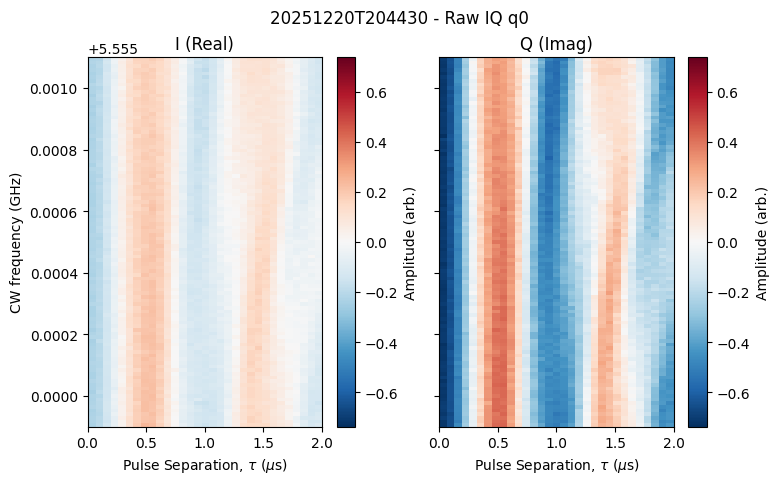

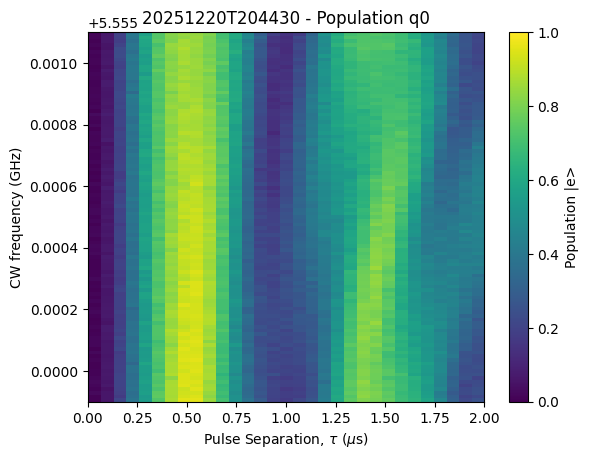

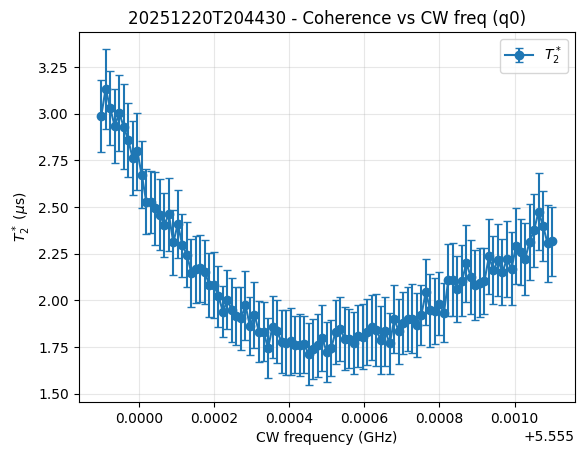

In [17]:
from experiments import coherence_spectroscopy


####################################################################################
q=qubits[0]
b=qubits[2]
temporary_parameters = {}
q_temp_pars =deepcopy(q.parameters)
b_temp_pars =deepcopy(b.parameters)
# b_temp_pars.drive_lo_frequency = 6.0e9
temporary_parameters[q.uid] = q_temp_pars
temporary_parameters[b.uid] = b_temp_pars

print(q.readout_parameters())

#####################################################################################
options = coherence_spectroscopy.experiment_workflow.options()
#workflow.show_fields(options)
options.count(1024*2)
options.update(False)
options.do_analysis(True)
options.ring_up(3000e-9)

######################################################################################
# Build and run resonator_spectroscopy_amplitude wormflow
co_spec = coherence_spectroscopy.experiment_workflow(
    session=session,
    qpu=qpu,
    qubit=q,
    bus= b,
    delays=np.linspace(0,2e-6,31), #delays=np.linspace(0,5e-6,21),
    #CW_frequencies= b.parameters.resonance_frequency_ge+np.linspace(-2e6,2e6,101),
    CW_frequencies= 5.5555e9 +np.linspace(-0.6e6,0.6e6,101),
    CW_amplitude=0.002,
    CW_phase=0.0,
    detunings=1.0e6,
    temporary_parameters=temporary_parameters,
    options=options
)
co_spec_result = co_spec.run()
#co_spec_analysis_result = co_spec_result.tasks["analysis_workflow"]

In [ ]:
co_spec_result.tasks["analysis_workflow"].tasks

In [ ]:
from laboneq.simple import show_pulse_sheet
from laboneq.contrib.example_helpers.plotting.plot_helpers import plot_simulation

show_pulse_sheet(compiled_experiment=co_spec_result.tasks["compile_experiment"].output,name='test', interactive=True)
#plot_simulation(compiled_experiment=co_spec_result.tasks["compile_experiment"].output)

In [ ]:
from experiments import amplitude_fine
q = qubits[0]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
temporary_parameters[q.uid] = temp_pars
#temp_pars.ge_drive_amplitude_pi =0.64
#######################################################################
repetitions =np.arange(1,12) # Due to short T1, 20   
#######################################################################
options = amplitude_fine.experiment_workflow_x180.options()
options.update(False)
options.use_cal_traces(True)
#options.do_pca(False)

#print(workflow.show_fields(options))

###################################################################
error_amp = amplitude_fine.experiment_workflow_x180(
    session=session,
    qpu=qpu,
    qubits=q,
    repetitions=repetitions,
    temporary_parameters=temporary_parameters,
    options=options
)

error_amp_result = error_amp.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
print(error_amp_result.tasks['analysis_workflow'].output)

In [ ]:
from experiments import amplitude_fine
q = qubits[0]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
temporary_parameters[q.uid] = temp_pars
#######################################################################
repetitions =np.arange(1,10)
#######################################################################
options = amplitude_fine.experiment_workflow_x90.options()
options.update(False)
options.use_cal_traces(True)
options.count(1024)

#print(workflow.show_fields(options))

###################################################################
error_amp_half = amplitude_fine.experiment_workflow_x90(
    session=session,
    qpu=qpu,
    qubits=q,
    repetitions=repetitions,
    temporary_parameters=temporary_parameters,
    options=options
)

error_amp_half_result = error_amp_half.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
print(error_amp_half_result.tasks['analysis_workflow'].output)

In [ ]:
from helper import load_qubit_parameters, save_qubit_parameters
save_qubit_parameters(qubits={ qubit.uid : qubit for qubit in qubits}, save_folder="./qubit_parameters/", filename="COSPEC")